## Metabolic pathway ranking through multiobjective optimization

Pablo Carbonell, 2019

### Problem statement

Metabolic pathway retrosynthesis tools like RetroPath2.0 can enumerate all production pathways linking a target chemical $T$ to the host. A viable pathway is any solution to the costraint optimization problem:

$$\mathbf{S}\mathbf{v} = \mathbf{0}$$
$$v^{lb}_i \le v_i \le v^{ub}_i$$
$$v_T > 0$$

where $\mathbf{v}$ is a vector containing the set of reactions involved in the pathways (metabolic scope), see Carbonell et al. 2012 for details).

The set of pathway solutions $\mathbf{P}$ constitutes the feasible set. In order to prioritize the selection of the pathway $p$, several objectives $f_i(p)$ can be considered in a typical metabolic pathway design project: number of enzymes, enzyme efficiency, theoretical titers and yields, etc. All of these are conflicting objectives and therefore it is not possible to identify a unique solution. Classical approaches have relied in reducing the problem to a single-objective optimization problem through scalarization, i.e. converting the multiple objective function into a single scalar function for instance by a weighting sum of the objectives. However, there is no obvious way for choosing the weights.

### Non-dominated pathways and Pareto-Optimal pathways

Here we take a different approach in order to perform the ranking:

- Determine the non-dominated solutions or Pareto-optimal set. Compute the set of pathway solutions that are non-dominated by other pathways. A pathway $p_i$ is said to dominate other pathway $p_j$ if:

 - The pathway $p_i$ is not worse than $p_j$ for any objective;
 - The pathway $p_i$ is strictly better than $p_j$ for at least one objective.
 
In general, we  might be interested either in maximizing or minimizing each objective, depending on the definition of our goal. Assuming that the initial problem is reformulated in order to become a minimization problem, the goal is to find

$$ \left. \begin{array}{r} \mathrm{Minimize} \quad f_m(p) \\ \mathrm{subject}\,\mathrm{to} \quad p \in \mathbf{P} \end{array}\right\}$$

where $\mathbf{P}$ constitutes the feasible set of pathway solutions.

Some useful definitions are:

- Ideal vector $z^*$ is the vector where each component corresponds to the minimum value of each objecive function $f^*_j$ in the set of solutions.
- Nadir vector $z_{nad}$ is the vector where is upper bound value of each objective function $f^*_j$ in the Pareto-optimal region.
- Pathway normalization (using the ideal and nadir as the extreme values). After normalization, the problem becomes a minimization problem within the unit hypercube in the positive subspace.

$$ f_i^{norm} = \frac{ f_i - z^*_i }{ z^{nad}_i - z^*{i} } $$

There exist several algorithms to compute the Pareto front (see Deb, 2005). We will follow an *onion peeling strategy* where progressively the Pareto fronts are computed and removed from the set. This will provide an ordered stratification of the pathway subpopulations.


### Weigthed-sum approach

In order to rank the pathways within a Pareto set, we will use a weigthed-sum approach. In case of no preference, a global criterion will be addopted using $L_p$ metrics (Miettinen, 1998) to measure the distance to the ideal vector $z^*$. Otherwise, a preference vector can be provided and in that case the distances will be weighted accordingly.

$$ \left( \sum_i^k |f_i(p) - z^* |^p \right) ^{1/p} $$



## Visualization for a 2D example

In [29]:
import numpy as np
import pandas as pd
%matplotlib inline
from rank import rankPaths, plotRanking

#Initialize a random example for 50 pathways and 2 scores

n = 50
titer = np.random.uniform(size=50)
thermo = np.random.normal(-5,4,size=50)
X = pd.DataFrame({'Thermo':thermo,'Titer':titer})
# In the example, titers are given higher preference than thermodynamics feasibility
pref = [-0.25,0.75 ]
X

,Thermo,Titer
0,-3.151075,0.941292
1,-9.217070,0.998452
2,-4.283643,0.309595
3,-10.097862,0.479733
4,-10.261537,0.753446
5,-11.989951,0.528725
6,-7.224665,0.776428
7,-1.265517,0.252715
8,-4.158733,0.820591
9,-3.079750,0.247634


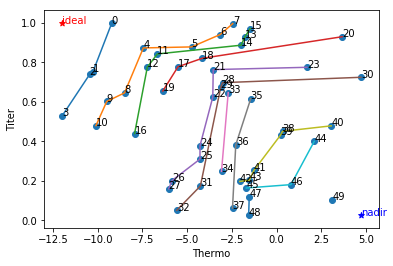

In [30]:
# Rank the pathways
ranking = rankPaths(X,pref)

# Visualize
plotRanking(X, pref, ranking)

## A higher-order example

In [3]:
import numpy as np
import pandas as pd
from rank import rankPaths

#Initialize a random example for 150 pathways and 8 scores
n = 150
m = 8
X = init( n,m )
# Set preference weight > 0 to maximize or < 0 to minimize
pref = np.random.uniform(low=-1,high=1,size=m)
# Some objectives can be set to zero (no preference)
pref[0] = 0
pref = pref/sum(pref)
print(pref)
pd.DataFrame(X, columns=['Criterion '+str(i) for i in np.arange(m)]).head()

[-0.          1.03634194  0.31040044  0.92767773  0.10463226 -1.23598588
  0.61701624 -0.76008273]


,Criterion 0,Criterion 1,Criterion 2,Criterion 3,Criterion 4,Criterion 5,Criterion 6,Criterion 7
0,0.136171,-1.843702,1.224563,-1.617254,0.248730,0.161405,-0.976639,0.692450
1,0.616183,0.722605,0.598029,-0.733260,1.228680,-1.563952,-0.629566,-0.133462
2,-0.975753,-0.219670,-0.979812,-0.206489,1.093723,0.625885,-0.071683,-1.311577
3,-0.916895,-1.225814,0.281840,1.220961,-0.354610,-0.761943,-1.392946,0.018750
4,-0.144029,-0.525307,2.303274,-1.142951,-0.558440,-0.103382,0.274613,0.899543


In [4]:
# Rank the pathways
ranking = rankPaths(X,pref)
ranking

array([141, 123,  70, 124,  36,  76,  90,   9,  62,  61,   7, 127, 118,
        59, 115, 132,  81,  56, 114,  96,  39, 134, 136,  20, 101,   1,
       116, 120,  88,  58, 125,  32,  12, 139, 129, 119,   8,  49, 109,
        92,  83,  26,  41,  50,  35, 146,  75,  78,  38, 113, 144,  34,
        68, 103,  77,  14, 105,  13, 130, 147,  99,  44,  37,  73, 108,
        42, 148,  69,  79,  21,  91,  15,  28, 133,  72,   2,  11,  53,
        22,   3,  97,  93,  52, 117,   6,  95, 131, 102,  64,  51,  23,
         4,  85, 149,  47,  98,  40,  10,  29,  84,  25,  57, 143,  71,
       145,  94,  86,  17,  65,  16,  19,  33,  54,  31, 128,   0, 107,
       112,  18,  74,  82,  27,  43,  66,  60,  30, 126,  80,  48, 142,
       138, 111,  87,  55, 135, 137, 140, 106, 121,  63,  67, 104, 122,
        45, 110, 100,  24,  46,  89,   5])

## References

Carbonell, Pablo, et al. "Enumerating metabolic pathways for the production of heterologous target chemicals in chassis organisms." BMC systems biology 6.1 (2012): 10.

Deb, Kalyanmoy. "Multi-objective optimization." Search methodologies. Springer, Boston, MA, 2005. 273-316.

Miettinen, Kaisa. "No-preference methods." Nonlinear Multiobjective Optimization. Springer, Boston, MA, 1998. 67-76.

Monfared, M. Davoodi, A. Mohades, and J. Rezaei. "Convex hull ranking algorithm for multi-objective evolutionary algorithms." Scientia Iranica 18.6 (2011): 1435-1442.


